In [39]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date
import os

Download today's data

In [46]:
url="https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-2020-"+"{0:0=2d}".format(today_month)+"-"+"{0:0=2d}".format(today_day)+".xlsx"
! wget $url --no-check-certificate

--2020-03-19 10:36:58--  https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-2020-03-19.xlsx
Resolving www.ecdc.europa.eu (www.ecdc.europa.eu)... 2600:9000:20ea:da00:1d:d83a:40c0:93a1, 2600:9000:20ea:7400:1d:d83a:40c0:93a1, 2600:9000:20ea:f400:1d:d83a:40c0:93a1, ...
Connecting to www.ecdc.europa.eu (www.ecdc.europa.eu)|2600:9000:20ea:da00:1d:d83a:40c0:93a1|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 200 OK
Length: 219317 (214K) [application/vnd.openxmlformats-officedocument.spreadsheetml.sheet]
Saving to: ‘COVID-19-geographic-disbtribution-worldwide-2020-03-19.xlsx.1’

COVID-19-geographic 100%[===================>] 214.18K   796KB/s    in 0.3s    

2020-03-19 10:36:59 (796 KB/s) - ‘COVID-19-geographic-disbtribution-worldwide-2020-03-19.xlsx.1’ saved [219317/219317]



In [50]:
today_day = date.today().day
today_month = date.today().month
data_fname = 'COVID-19-geographic-disbtribution-worldwide-2020-'+"{0:0=2d}".format(today_month)+"-"+"{0:0=2d}".format(today_day)+'.xlsx'
dat = pd.read_excel(data_fname)
dat.head()

,DateRep,Day,Month,Year,Cases,Deaths,Countries and territories,GeoId
0,2020-03-19,19,3,2020,0,0,Afghanistan,AF
1,2020-03-18,18,3,2020,1,0,Afghanistan,AF
2,2020-03-17,17,3,2020,5,0,Afghanistan,AF
3,2020-03-16,16,3,2020,6,0,Afghanistan,AF
4,2020-03-15,15,3,2020,3,0,Afghanistan,AF


In [51]:
Countries = ['Italy','China','United_States_of_America','South_Korea','Iran','Canada']

If we assume a 30 day window of transmission, i.e. after 30 days the virus is no longer transmissible, then we can obtain a value for the # of active transmitters by taking the difference between the cumulative cases up to today and the cumulative cases from 30 days ago

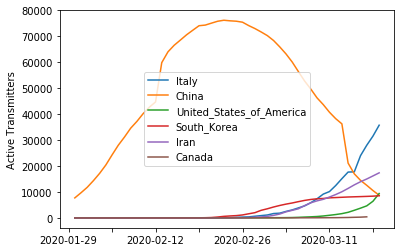

In [52]:
dat['DateRep']= pd.to_datetime(dat['DateRep'])
fig, ax = plt.subplots()
for c in Countries:
    # find all rows corresponding to country c
    DF = dat[dat['Countries and territories']==c].sort_values('DateRep')
    
    # cumulative sum of cases - cumulative sum of cases 30 days ago
    # i.e. all new cases from the past 30 days
    DF['DiffCases'] = DF['Cases'].cumsum().diff(30)
    DF = DF[['DateRep','DiffCases']].dropna()

    plt.plot(DF['DateRep'],DF['DiffCases'])
    
    # only show every other date tick (avoid clutter)
    every_nth = 2
    for n, label in enumerate(ax.xaxis.get_ticklabels()):
        if n % every_nth != 0:
            label.set_visible(False)
plt.legend(Countries)
plt.ylabel('Active Transmitters')
plt.show()